# Group-6
## Real and Fake Job Posting Prediction

#### Team Members: 
##### Yaswanth Reddy Yarrabandla
##### Lakshmi Jyothsna Machavarapu
##### Tushar Vantaram 
##### Bhavana Tumkunta

# About Dataset

This Dataset contains 18,000 Job Descriptions out of which about 800 are Fraudelent. The Data consists of both Textual Information and Meta Information about the Jobs. Here is the link to explore the public data repository.

Kaggle Link: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

Dataset contains the Following Columns:

- job id - ID number provided to each and every Job provided in the Dataset.
- title - Job Title provided.
- location - Job Location / Posting as per the Dataset.
- salary_range - Range for Salary by the Employer.
- company_profile - Short Description about the Company.
- description - Job Description provided on the Job Opportunity.
- requirements - Job Requirements to be fulfilled for the Job.
- benefits - Employee Benefits provided by the company.
- telecommuting - Whether the Job requires telecommuting works.
- has_company_logo - Whether the Company has its own Company Logo or not.
- has_questions - Whether the Company has asked questions or not.
- employment_type - Category of Employment provided for the Employees.
- required_experience - Type of the Previous Experience required from the Employees.
- required_education - Education Qualifications required from the Employees.
- Industry - Domain in which the Company does work into.
- Function - Type of Profession the Company follows.
- Fraudulent - Whether the Job Posting is Real or Fake

# Library Imports and Setup

In [3]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and feature extraction
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Model training and evaluation
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# Sampling techniques for imbalance
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier

# Advanced machine learning models
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Deep learning with TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Miscellaneous
from collections import Counter
import category_encoders as ce



In [4]:
#Importing the dataset 
df = pd.read_csv('fake_job_postings1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [3]:
# The shape of the Dataset (rows * columns)
df.shape

(17880, 18)

In [5]:
#Descriptive Statistics
df.describe(include = 'object')

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15184,10668,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11967,6204,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


#### The dataset contains 17,880 entries with varying counts of non-null values across columns, indicating some missing data (e.g., department and salary_range). Columns like title and industry have a high number of unique values, showing diversity in the data. Some fields, such as employment_type, are dominated by a single category, reflecting a skewed distribution. This summary highlights the need for data cleaning and preprocessing before analysis.

# Basic Preprocessing - Visualizing and Analyzing Missing Values

In [6]:
df.isnull().sum().sort_values(ascending=False)

salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

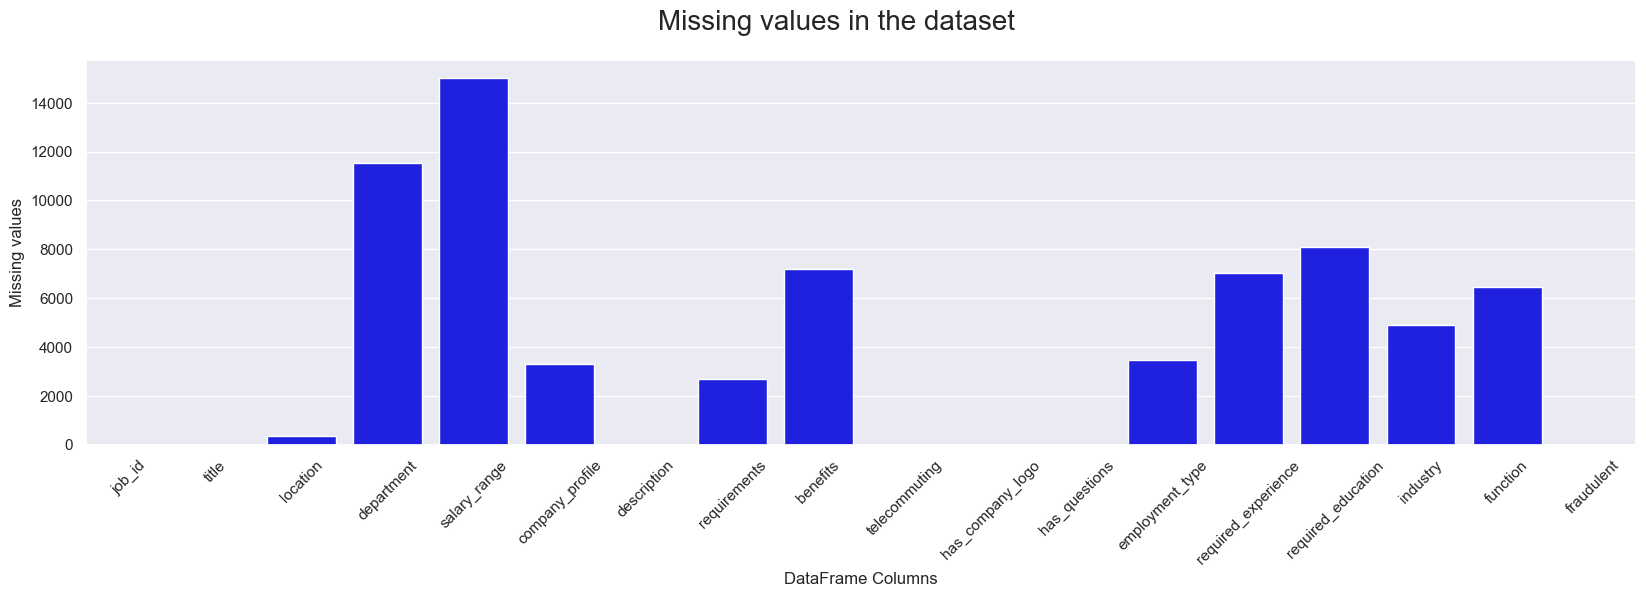

salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.335570
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.078300
location                1.935123
description             0.005593
job_id                  0.000000
telecommuting           0.000000
has_questions           0.000000
has_company_logo        0.000000
title                   0.000000
fraudulent              0.000000
dtype: float64


In [14]:
null_values = df.isnull().sum()
plt.figure(figsize=(20, 5))

sns.barplot(x=null_values.index, y=null_values, color='blue')  

plt.suptitle('Missing values in the dataset', size=20)
plt.xlabel('DataFrame Columns')
plt.ylabel('Missing values')
plt.xticks(rotation=45)
plt.show()

# Print the percentage of missing values for each column
print(df.isnull().sum().sort_values(ascending=False) / len(df.index) * 100)

# Identifying Categorical Columns for Preprocessing

In [15]:
categorical_columns = []

for col in df.columns:
    print(f'Unique rows in {col}:', df[col].nunique())
    if df[col].nunique() < 15:
        categorical_columns.append(col)
print('Categorical columns:',categorical_columns)

Unique rows in job_id: 17880
Unique rows in title: 11231
Unique rows in location: 3105
Unique rows in department: 1337
Unique rows in salary_range: 874
Unique rows in company_profile: 1709
Unique rows in description: 14801
Unique rows in requirements: 11967
Unique rows in benefits: 6204
Unique rows in telecommuting: 2
Unique rows in has_company_logo: 2
Unique rows in has_questions: 2
Unique rows in employment_type: 5
Unique rows in required_experience: 7
Unique rows in required_education: 13
Unique rows in industry: 131
Unique rows in function: 37
Unique rows in fraudulent: 2
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


In [16]:
# Fill missing values in non-categorical string columns with empty strings

for col in list(set(df.columns) - set(categorical_columns)):
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna('')
print(df.isnull().sum())

job_id                    0
title                     0
location                  0
department                0
salary_range              0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry                  0
function                  0
fraudulent                0
dtype: int64


In [17]:
# Filling missing values in specific columns with meaningful placeholders

df['employment_type'] = df['employment_type'].fillna('Employement Unavailable')
df['required_experience'] = df['required_experience'].fillna('Experience Unavailable')
df['required_education'] = df['required_education'].fillna('Unspecified')

In [18]:
# Checking the missing values after basic Preprocessing
print(df.isnull().sum())

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


#### All missing values have been successfully addressed, and the dataset now contains no null values in any columns.

# Analyzing the percentage of each class in the target variable to quantify class imbalance and visualizing it with a count plot for better understanding.

Percentage of Data with Class 0:  95.1565995525727
Dercentage of Data with Class 1:  4.8434004474272925


Text(0.5, 1.0, 'Count Plot of the Classes')

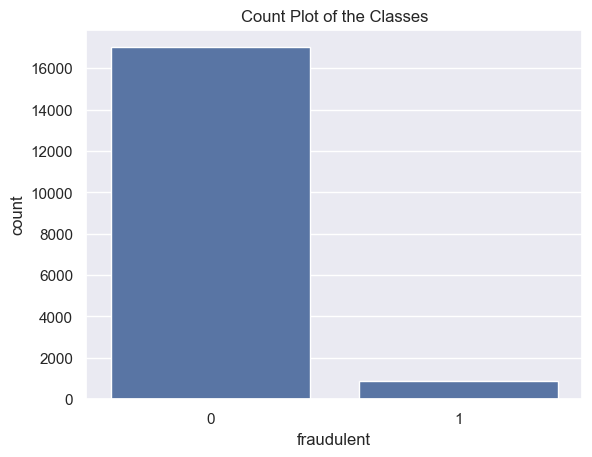

In [7]:
# Checking the percentage of data for each class
print("Percentage of Data with Class 0: ",df['fraudulent'].value_counts()[0] /df.shape[0] *100)
print("Dercentage of Data with Class 1: ",df['fraudulent'].value_counts()[1] /df.shape[0] *100)

# Visualizing class distribution
sns.set(style="darkgrid")
ax = sns.countplot(x = "fraudulent", data = df)
ax.set_title("Count Plot of the Classes")

#### The dataset exhibits a significant class imbalance, with 95.16% of entries belonging to Class 0 (Real Job Postings) and only 4.84% to Class 1 (Fake Job Postings). This imbalance requires attention during preprocessing to ensure the model performs fairly and accurately across both classes.

# Exploratory Data Analysis Starts...

### 1. The first EDA step examines the distribution of job postings across different experience levels while comparing fraudulent and non-fraudulent postings. This visualization provides a deeper understanding of how fraud is associated with specific experience requirements. The annotated bar chart highlights the count of jobs for each category, making it easier to interpret patterns and potential correlations between experience levels and fraudulence.

C:\Users\yaswa\AppData\Local\Temp\ipykernel_23628\2729471542.py:9: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  barplot = sns.barplot(x='required_experience', y='job_posting', hue='fraudulent', data=aggregated_data, palette=palette)


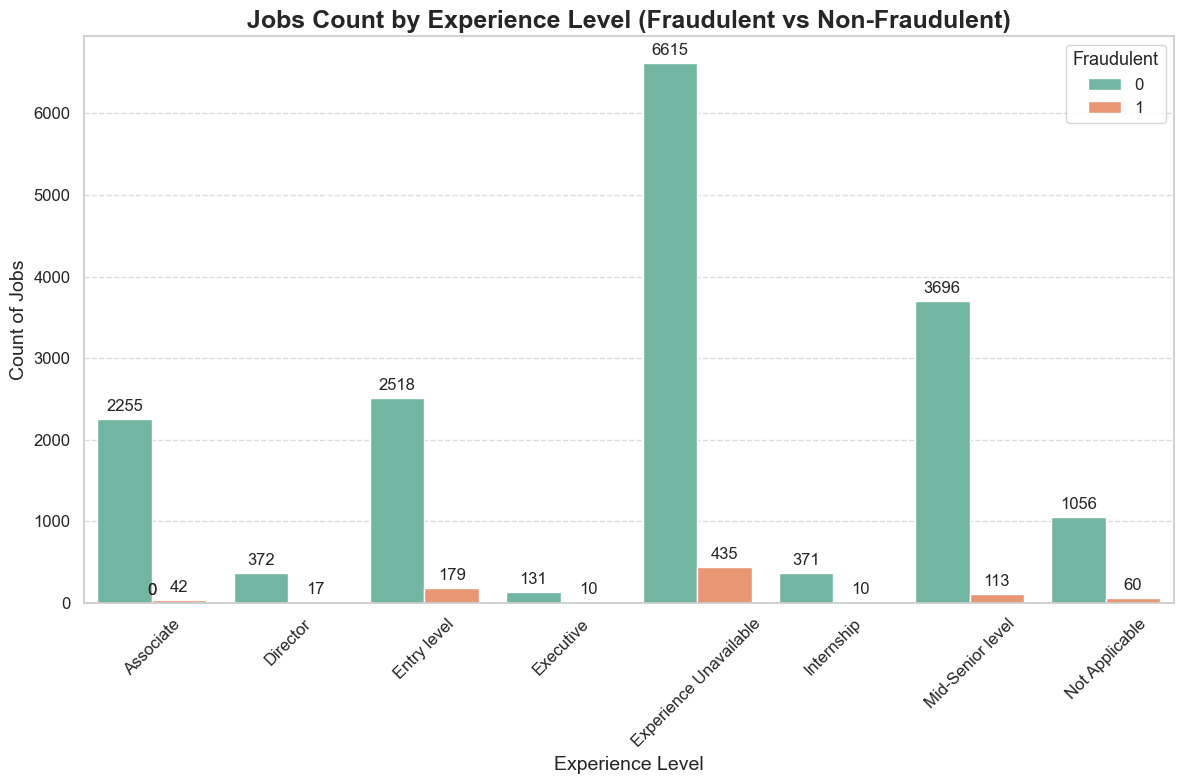

In [28]:
aggregated_data = df.groupby(['required_experience', 'fraudulent'])['job_posting'].count().reset_index()

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")  # Choose a pleasant color palette
barplot = sns.barplot(x='required_experience', y='job_posting', hue='fraudulent', data=aggregated_data, palette=palette)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),  # Format the label
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
                     ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points', fontsize=12)

plt.title('Jobs Count by Experience Level (Fraudulent vs Non-Fraudulent)', fontsize=18, weight='bold')
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count of Jobs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Lighter gridlines

plt.legend(title='Fraudulent', loc='upper right', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()

### 2. The Second EDA step visualizes the count of job postings from the top 20 countries, segmented by fraudulent and non-fraudulent statuses. The log scale on the y-axis helps highlight differences in counts, even for countries with significantly fewer job postings. This analysis provides insights into geographic trends in fraudulent job postings, helping identify regions where fraud might be more prevalent.

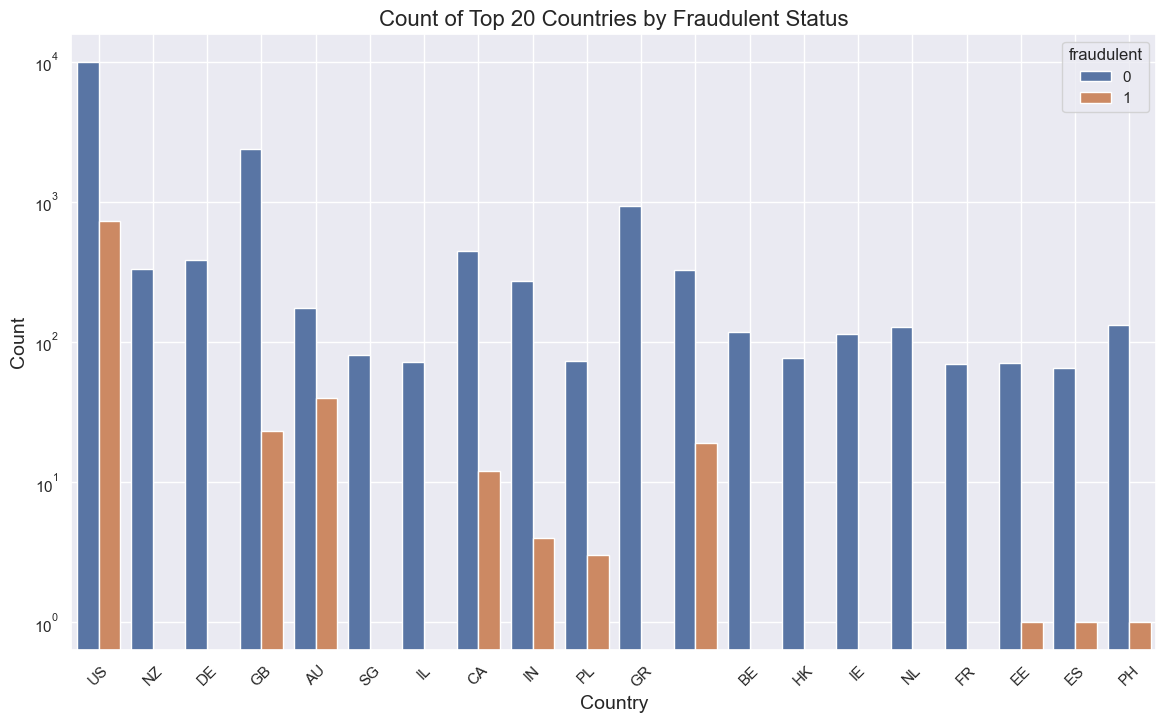

In [27]:
#As part of EDA, the location column was split into location_Country and location_State_City for better geographic insights.
#This helps identify patterns at both the country and local levels, making the data more structured and usable for further analysis.

df['location_Country'] = df['location'].str.split(',', n=1).str[0]  # Keep the first part as 'Country'
df['location_State_City'] = df['location'].str.split(',', n=1).str[1]  # Combine State and City in the second column

top_20_countries = df['location_Country'].value_counts().index[:20]

plt.figure(figsize=(14, 8))
sns.countplot(x='location_Country', hue='fraudulent', data=df[df['location_Country'].isin(top_20_countries)])

plt.title('Count of Top 20 Countries by Fraudulent Status', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(True)
plt.show()

### 3. The third step in the exploratory data analysis (EDA) involves visualizing the distribution of job postings across different employment types. This plot provides insights into how job types (e.g., full-time, part-time, contract) are represented in the dataset, helping us understand the diversity and frequency of employment categories. This can guide feature engineering and model building.

C:\Users\yaswa\AppData\Local\Temp\ipykernel_23628\2002234686.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='employment_type', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

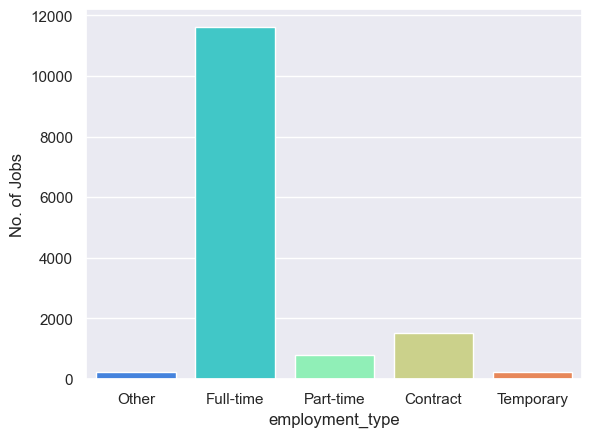

In [8]:
ax=sns.countplot(data=df, x='employment_type', palette='rainbow')
ax.set_ylabel('No. of Jobs')

### 4. The fourth EDA step visualizes the distribution of job postings based on the required experience levels. This analysis helps us understand the prevalence of various experience requirements (e.g., Entry level, mid-senior level) across the dataset

C:\Users\yaswa\AppData\Local\Temp\ipykernel_23628\1517523785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='required_experience', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

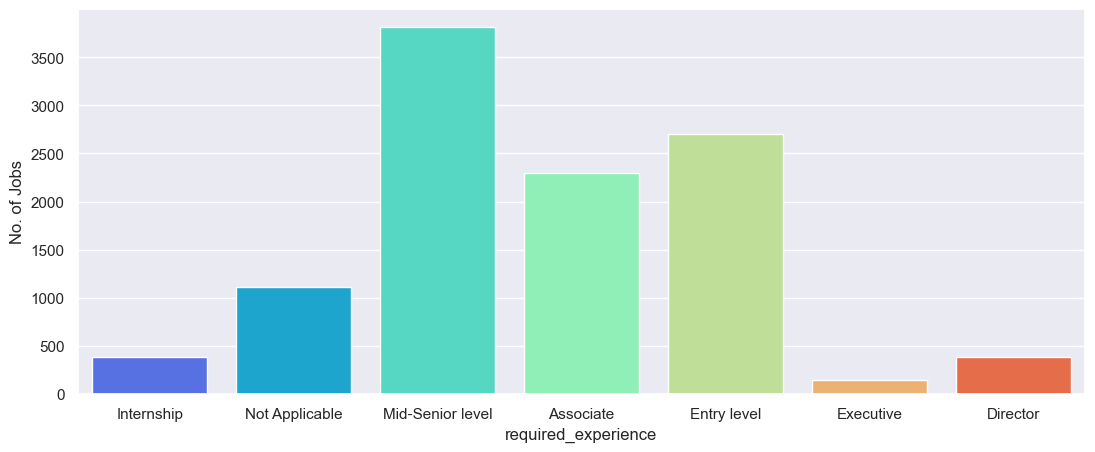

In [9]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

### 5. The Fifth EDA step focuses on the distribution of job postings by the top 5 required education levels. This plot provides insights into the most common educational qualifications sought by employers, helping us understand the dataset's educational trends

C:\Users\yaswa\AppData\Local\Temp\ipykernel_23628\884709019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

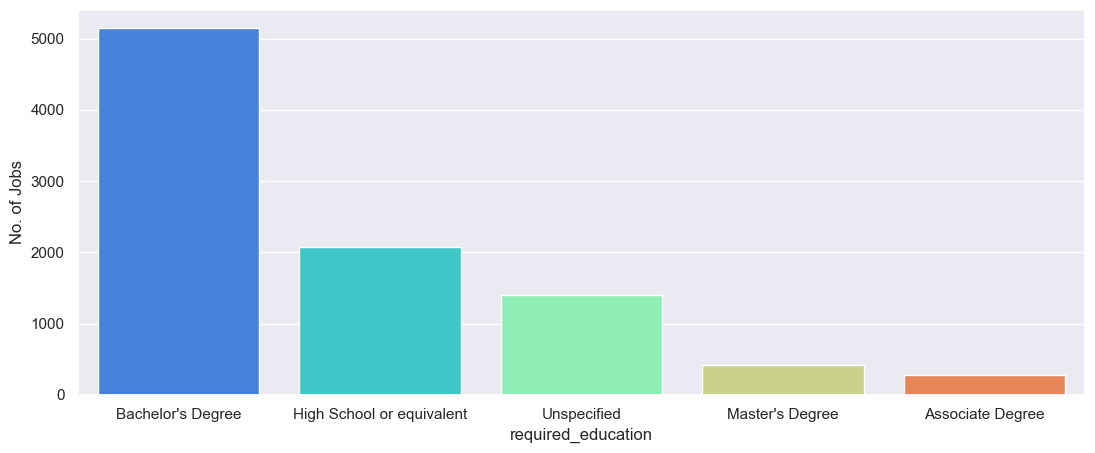

In [10]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

# Visualizing Text Data with WordClouds

In [32]:
def generate(string,ngram):
    n_grams=ngrams(word_tokenize(text),ngram)
    grams=[" ".join(val) for val in n_grams]
    return grams

In [34]:
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

# Remove stopwords from each job description
df["description"] = df["description"].apply(
    lambda x: " ".join(word for word in x.split() if word.lower() not in stop))

#### Text Cleaning and Preprocessing

#### To ensure the text data is clean and consistent for analysis, a custom clean function was developed. This function performs the following preprocessing steps:

##### Standardization: Converts all text to lowercase for uniformity.
##### HTML and URL Removal: Strips out HTML tags and web links to retain meaningful content.
##### Noise Reduction: Removes punctuations, digits, underscores, and unnecessary characters.
##### Whitespace Management: Eliminates extra spaces and isolated single characters.
##### Text Normalization: Applies stemming using the Snowball Stemmer to reduce words to their root forms.
##### Stopword Removal: Filters out common stopwords to focus on significant terms.
##### This preprocessing ensures that the text is free from noise and ready for feature extraction, aiding in building more effective models.

In [35]:
def clean(text): 
    text=text.lower()
    obj=re.compile(r"<.*?>") #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+") #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]") #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}") #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+") #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s\w\s") #removing single character
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}") #removing multiple spaces
    text=obj.sub(r" ",text)  
    
    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]
    
    return " ".join(text)

In [36]:
from nltk.stem import SnowballStemmer
df["description"]=df["description"].apply(clean)

In [37]:
df["description"].iloc[1]

'organis focus vibrant awesom passion custom servic slick type skill mayb account manag think administr cooler polar bear jetski need hear cloud video product servic opper glodal level yeah pretti cool serious deliv world class product excel custom servic rapid expand busi look talent project manag manag success deliveri video project manag client communic drive product process work coolest brand planet learn global team repres nz huge way enter next growth stage busi grow quick intern therefor posit burst opportun right person enter busi right time second world cloud video product servic second world cloud video product servic enabl brand agenc get high qualiti onlin video content shot produc anywher world fast afford manag seamless cloud purchas publish second remov hassl cost risk speed issu work regular video product compani manag everi aspect video project beauti onlin experi grow network rate video profession countri dedic product success team countri guarante video project succe

In [38]:
# Apply preprocessing to relevant text columns
text_columns = ['title', 'company_profile', 'requirements', 'benefits']
for col in text_columns:
    df[col] = df[col].apply(clean)
    df[col] = df[col].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in stop))

In [42]:
# Combine Text Features
df['combined_text'] = df[text_columns].agg(' '.join, axis=1)

(-0.5, 599.5, 599.5, -0.5)

<Figure size 3000x3000 with 0 Axes>

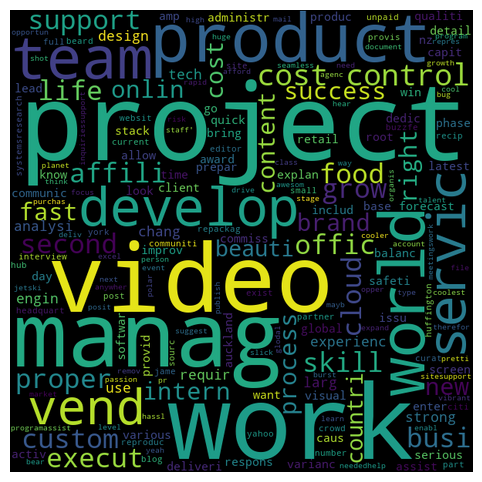

In [46]:
from wordcloud import WordCloud,STOPWORDS

real = df[df['fraudulent']==0]['description'].values
cloud = WordCloud(width= 600, height= 600, stopwords= STOPWORDS, 
                      background_color='black').generate(str(real))

fig = plt.figure(figsize = (30, 30))
plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation= 'blackman')
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

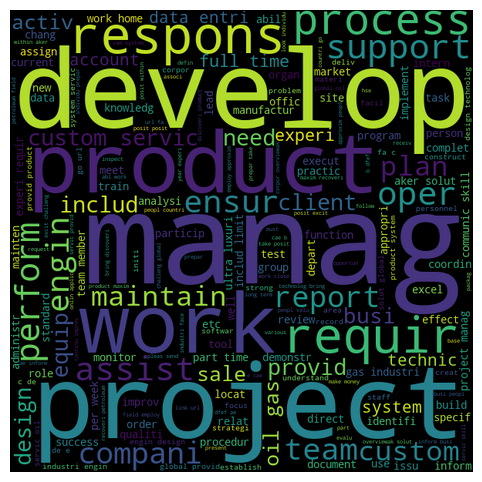

In [47]:
fake = df[df['fraudulent']==1]['description'].values
cloud = WordCloud(width= 600, height= 600, stopwords= STOPWORDS, 
                      background_color='black').generate(str(fake))

fig = plt.figure(figsize = (12, 6))
plt.imshow(cloud, interpolation= 'blackman')
plt.axis('off')

### Feature Extraction with TF-IDF Vectorizer

In [ ]:
# Vectorization
# Using TF-IDF for text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

##### To convert textual data into numerical features suitable for machine learning models, the TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer was used.

# Splitting the Dataset into Training and Testing Sets

In [50]:
# Train-Test Split
X = df['combined_text']
y = df['fraudulent']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Fit the vectorizer on training data and transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Lets dive into the Models.....

### Model-1 Random Forest(Before Treating Imbalance) 

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9801454138702461
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.89      0.68      0.77       173

    accuracy                           0.98      3576
   macro avg       0.94      0.84      0.88      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
 [[3388   15]
 [  56  117]]


# Handling Imbalance Using SMOTE and ADASYN(Adaptive Synthetic)

In [ ]:
# Define SMOTE and ADASYN for oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Use SMOTE to start balancing
adasyn = ADASYN(sampling_strategy=1.0, random_state=42)  # Use ADASYN to focus on harder-to-classify samples

### Using Random Forest(After Treating Imbalance)

In [116]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

pipeline = Pipeline([
    ('smote', smote),
    ('adasyn', adasyn),
    ('classifier', rf)
])

cv_scores = cross_val_score(pipeline, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Output the cross-validation results
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model
pipeline.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test_tfidf)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation accuracy scores: [0.97693114 0.97658161 0.97867878 0.9751835  0.97517483]
Mean CV accuracy: 0.9765099737731685
Accuracy: 0.9832214765100671
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.88      0.75      0.81       173

    accuracy                           0.98      3576
   macro avg       0.94      0.87      0.90      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
 [[3386   17]
 [  43  130]]


#### The Random Forest model, combined with SMOTE and ADASYN to address class imbalance, achieved a 98.32% accuracy on the test set. It showed excellent precision and recall for non-fraudulent postings, with an F1-score of 81% for fraudulent cases.

In [67]:
# Check the new class distribution after SMOTE and adasyn
X_resampled, y_resampled = pipeline['smote'].fit_resample(X_train_tfidf, y_train)
X_resampled, y_resampled = pipeline['adasyn'].fit_resample(X_resampled, y_resampled)

# Print the class distribution after both SMOTE and ADASYN
print("Class distribution after SMOTE and ADASYN:", Counter(y_resampled))

Class distribution after SMOTE and ADASYN: Counter({0: 13611, 1: 13605})


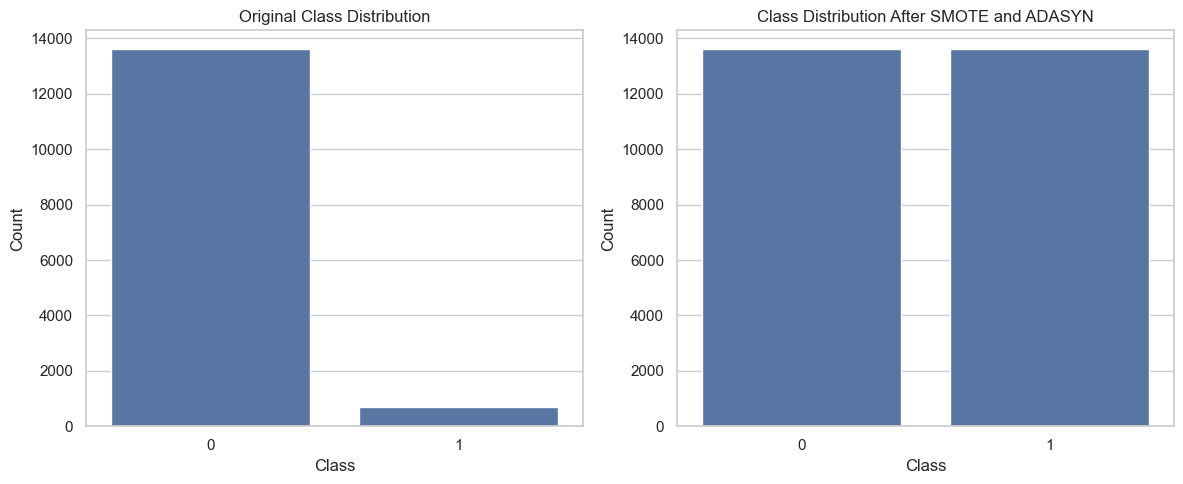

In [69]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE and ADASYN')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Model-2 LSTM(Long Short Term Memory)

In [103]:
# Define the LSTM model structure
def build_lstm_model(input_shape):
    model = Sequential()
    
    # Apply SpatialDropout1D without specifying input_shape
    model.add(SpatialDropout1D(0.3))
    
    # First Bidirectional LSTM layer with input shape specified here
    model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.4))

    # Second Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.4))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
    
    return model

In [104]:
X_train_dense = X_resampled.toarray()
X_test_dense = X_test_tfidf.toarray()
X_train_reshaped = np.reshape(X_train_dense, (X_train_dense.shape[0], 1, X_train_dense.shape[1]))
X_test_reshaped = np.reshape(X_test_dense, (X_test_dense.shape[0], 1, X_test_dense.shape[1]))


input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
lstm_model = build_lstm_model(input_shape)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
lstm_model.fit(X_train_reshaped, y_resampled, epochs=20, batch_size=32, validation_split=0.1,
               callbacks=[early_stopping, reduce_lr, model_checkpoint])

# Make predictions on the test set
y_pred_proba = lstm_model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.35).astype(int)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("LSTM Classification Report:\n", classification_report(y_test, y_pred))
print("LSTM Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\yaswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 98s 110ms/step - accuracy: 0.6321 - loss: 0.5936 - val_accuracy: 1.0000 - val_loss: 0.2407 - learning_rate: 1.0000e-04
Epoch 2/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 77s 100ms/step - accuracy: 0.9418 - loss: 0.1749 - val_accuracy: 1.0000 - val_loss: 0.1050 - learning_rate: 1.0000e-04
Epoch 3/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 69s 90ms/step - accuracy: 0.9648 - loss: 0.1028 - val_accuracy: 1.0000 - val_loss: 0.0733 - learning_rate: 1.0000e-04
Epoch 4/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 73s 95ms/step - accuracy: 0.9718 - loss: 0.0821 - val_accuracy: 1.0000 - val_loss: 0.0631 - learning_rate: 1.0000e-04
Epoch 5/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.9787 - loss: 0.0679 - val_accuracy: 1.0000 - val_loss: 0.0555 - learning_rate: 1.0000e-04
Epoch 6/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 111s 145ms/step - accuracy: 0.9813 - loss: 0.0603 - val_accuracy: 1.0000 - val_loss: 0.0463 - learning_rate: 1.0000e-04
Epoch 7/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 96s 126

#### The Bidirectional LSTM model achieved a 97% accuracy on the test set, with strong performance on the majority class (Class 0: Non-Fraudulent). For the minority class (Class 1: Fraudulent), it achieved a recall of 87% and an F1-score of 77%, effectively identifying most fraudulent postings. The model's performance highlights its reliability while leaving room for improving precision for fraudulent cases.

### Model-3 XGBoost 

In [110]:
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    scale_pos_weight=3,  
    random_state=42
)

xgb_model.fit(X_resampled, y_resampled)

y_pred_proba_xgb = xgb_model.predict_proba(X_test_tfidf)[:, 1]

threshold = 0.35
y_pred_xgb = (y_pred_proba_xgb >= threshold).astype(int)

# Evaluate the refined model
print("Refined XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Refined XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Refined XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      3403
           1       0.30      0.92      0.45       173

    accuracy                           0.89      3576
   macro avg       0.65      0.90      0.70      3576
weighted avg       0.96      0.89      0.92      3576

Refined XGBoost Confusion Matrix:
 [[3029  374]
 [  14  159]]


### The XGBoost model achieved 89% accuracy, with a strong recall of 92% for fraudulent postings, effectively minimizing false negatives, though precision for fraudulent cases remains a challenge.

### Model-4 SVM(Supprt Vector Machine)

In [112]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Train SVM on resampled data
svm_model.fit(X_resampled, y_resampled)

# Predict probabilities on the test set
y_pred_proba_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]

# Adjust threshold for better recall (e.g., 0.4 or 0.45 if needed)
threshold = 0.4
y_pred_svm = (y_pred_proba_svm >= threshold).astype(int)

# Evaluate the SVM model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.97      0.75      0.85       173

    accuracy                           0.99      3576
   macro avg       0.98      0.88      0.92      3576
weighted avg       0.99      0.99      0.99      3576

SVM Confusion Matrix:
 [[3399    4]
 [  43  130]]


### The SVM model with an RBF kernel delivered the best results, achieving an impressive 99% accuracy. It demonstrated near-perfect precision and recall for non-fraudulent postings (Class 0) and achieved a strong F1-score (85%) for fraudulent postings (Class 1). The balance between high precision and recall for both classes makes this the most reliable model in the project

## Model Comparison Table

Below is a comparison of all the models evaluated during the project, highlighting their performance on key metrics:

| **Model**                  | **Accuracy** | **Class 0 Precision** | **Class 0 Recall** | **Class 0 F1 Score** | **Class 1 Precision** | **Class 1 Recall** | **Class 1 F1 Score** |
|----------------------------|--------------|------------------------|--------------------|----------------------|-----------------------|--------------------|----------------------|
| **Random Forest (Before SMOTE)** | 98.32%       | 0.99                   | 1.00               | 0.99                 | 0.88                  | 0.75               | 0.81                 |
| **LSTM**                   | 97%          | 0.99                   | 0.98               | 0.99                 | 0.69                  | 0.87               | 0.77                 |
| **SVM**                    | 99%          | 0.99                   | 1.00               | 0.99                 | 0.97                  | 0.75               | 0.85                 |
| **XGBoost**                | 89%          | 1.00                   | 0.89               | 0.94                 | 0.30                  | 0.92               | 0.45                 |

### Observations:
- **SVM Model**: Achieved the highest accuracy (**99%**) and balanced performance, making it the best-performing model overall.
- **Random Forest**: Performed well with strong Class 0 recall and balanced Class 1 metrics.
- **LSTM**: Delivered strong recall for Class 1 (**87%**) but slightly lower precision.
- **XGBoost**: Focused on maximizing recall for Class 1 (**92%**) but had lower precision, making it less reliable overall.

The **SVM model** stands out as the most effective for this dataset, with excellent precision and recall across both classes.


In [ ]:
import joblib
joblib.dump(svm_model,"svm_model.pkl")
joblib.dump(tfidf_vectorizer,"tfidf_vectorizer.pkl")